In [4]:
import sys
sys.path.append('../../')
import time 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from qsopt.plots import plot_countour
from qsopt.optim import method_optim
from qsopt.search import line_search

In [5]:
import sympy as sy
from sympy import *
x1, x2 = sy.symbols("x1 x2")
func = (x1-2)**4 + (x1-2*x2)**2
print('Objective Function: ', func)
print('Gradient: ', Matrix([func]).jacobian(Matrix(list(func.free_symbols))))
print('Hessian: ', sy.hessian(func, varlist=[x1, x2]))

Objective Function:  (x1 - 2)**4 + (x1 - 2*x2)**2
Gradient:  Matrix([[-4*x1 + 8*x2, 2*x1 - 4*x2 + 4*(x1 - 2)**3]])
Hessian:  Matrix([[12*(x1 - 2)**2 + 2, -4], [-4, 8]])


In [6]:
f = lambda x: (x[0]-2)**4 + (x[0]-2*x[1])**2
grad = lambda x: np.array([-4*x[0]+8*x[1], 2*x[0]-4*x[1]+4*(x[0]-2)**3])
hess = lambda x: np.array([[12*(x[0]-2)**2, -4],[-4,8]])

initial_point = np.array([3,2])

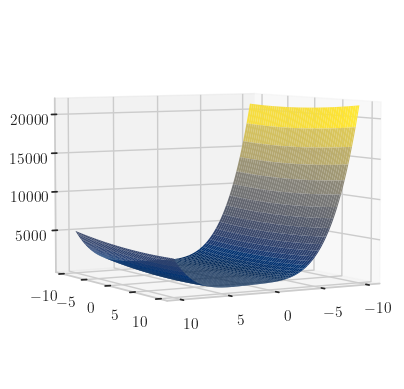

In [7]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(5, 60)
ax.plot_surface(X, Y, Z, cmap='cividis', linewidth =0)

In [12]:

def minimize(method, f, x0, grad=None, hess=None): 
    if method == 'univariant':
        x = method_optim(method_name='univariant', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'powell':
        x = method_optim(method_name='powell', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'steep_descent':
        x = method_optim(method_name='steepest_descent', objective_function=f, gradient=grad, initial_point=x0)
    elif method =='flether_reeves':
        x = method_optim(method_name='fletcher_reeves', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'bfgs':
        x = method_optim(method_name='bfgs', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'newton_raphson':
        x = method_optim(method_name='newton_raphson', objective_function=f, gradient=grad, hessian=hess, initial_point=x0)
    return x

def c(x):
    return np.array([x[0]**2 - x[1]])


Resultado Final:
Valor ótimo de x: [0.95017625 0.90283487]
Valor ótimo da função objetivo: 1.946559505840873


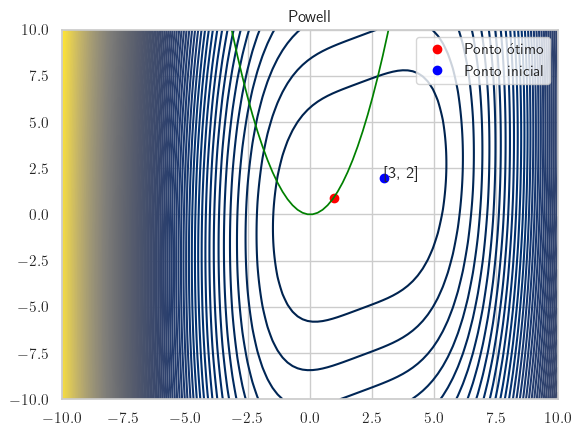


Resultado Final:
Valor ótimo de x: [0.94425484 0.89161819]
Valor ótimo da função objetivo: 1.9462183808767453


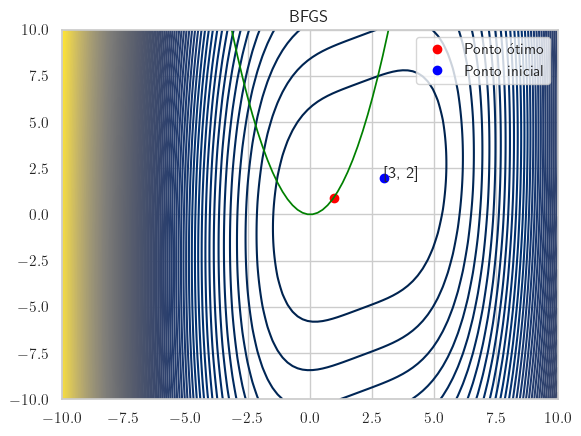

In [96]:
import scipy.optimize as opt
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
f = lambda x: (x[0]-2)**4 + (x[0]-2*x[1])**2
g = lambda x: x[0]**2 - x[1]

def phi(x, ro):
    # Função de penalidade para incorporar restrição
    return f(x) + 0.5*ro*max(0, g(x))**2

def otimizacao_por_penalidade(method_name, x0, ro_inicial, beta, max_iter=10, tol=1e-6):
    x = x0
    ro = ro_inicial

    for i in range(max_iter):
        resultado = minimize(lambda x: phi(x, ro), x, method=method_name)
        x = resultado.x
        ro *= beta  

        if 0.5*ro*max(0, g(x))**2 < tol:
            break

    return x, resultado.fun

# Condições iniciais
x0 = np.array([3, 2])
ro_inicial = 1.0
beta = 10

resultados = []

for method_name in ['Powell', 'BFGS']:
    # Chamando a função de otimização por penalidade em um loop
    resultado_final, valor_final = otimizacao_por_penalidade(method_name, x0, ro_inicial, beta)
    resultados.append([method_name, resultado_final, valor_final])

    print("\nResultado Final:")
    print("Valor ótimo de x:", resultado_final)
    print("Valor ótimo da função objetivo:", valor_final)

    # plot the functions and results
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 150, cmap='cividis')
    plt.plot(resultado_final[0], resultado_final[1], 'ro', label='Ponto ótimo')
    plt.plot(x0[0], x0[1], 'bo', label = 'Ponto inicial')
    plt.text(x0[0], x0[1], f'[{x0[0]}, {x0[1]}]', fontsize=12)

    # plot constraint g
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    plt.contour(X, Y, Z, 0, colors='green', linewidths=1.25)

    plt.legend()
    plt.title(method_name)
    plt.savefig(f'penalidade_{method_name}_{x0}.pdf')
    plt.show()

tab = pd.DataFrame(resultados, columns=['Método', 'x', 'f(x)'])
tab.to_latex('penalidade.tex', index=False)



Resultado Final:
Valor ótimo de x: [1. 1.]
Valor ótimo da função objetivo: -inf


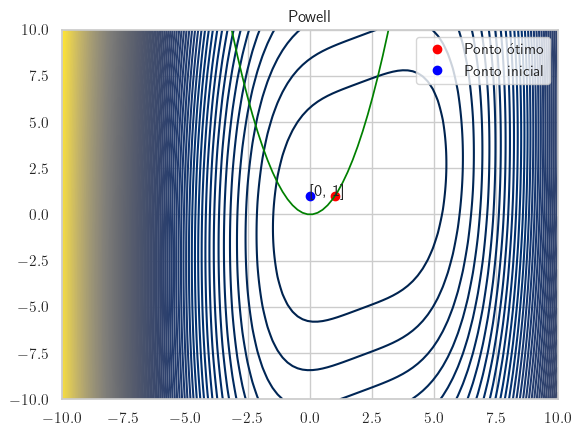


Resultado Final:
Valor ótimo de x: [1.40306585 0.72779351]
Valor ótimo da função objetivo: -0.6762016669773485


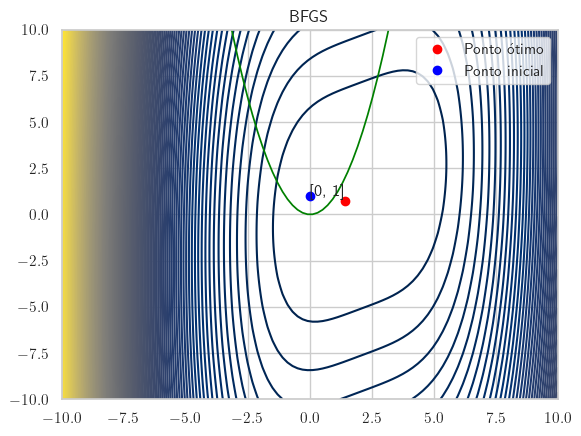

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function to be minimized
f = lambda x: (x[0] - 2)**4 + (x[0] - 2 * x[1])**2
g = lambda x: x[0]**2 - x[1]

def phi(x, ro):
    # Função de barreira para incorporar restrição
    return f(x) + ro * np.sum(1/-g(x))

def otimizacao_por_barreira(method_name, x0, ro_inicial, beta, max_iter=10, tol=1e-6):
    x = x0
    ro = ro_inicial

    for i in range(max_iter):
        resultado = minimize(lambda x: phi(x, ro), x, method=method_name, constraints={'type': 'ineq', 'fun': g})
        x = resultado.x
        ro *= beta

        if ro * np.sum(1/-g(x)) < tol:
            break

    return x, resultado.fun

# Condições iniciais
x0 = np.array([0, 1])
ro_inicial = 10
beta = 0.1

resultados = []

for method_name in ['Powell', 'BFGS']:
    # Chamando a função de otimização por barreira em um loop
    resultado_final, valor_final = otimizacao_por_barreira(method_name, x0, ro_inicial, beta)
    resultados.append([method_name, resultado_final, valor_final])

    print("\nResultado Final:")
    print("Valor ótimo de x:", resultado_final)
    print("Valor ótimo da função objetivo:", valor_final)

    # Plot the functions and results
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 150, cmap='cividis')
    plt.plot(resultado_final[0], resultado_final[1], 'ro', label='Ponto ótimo')
    plt.plot(x0[0], x0[1], 'bo', label='Ponto inicial')
    plt.text(x0[0], x0[1], f'[{x0[0]}, {x0[1]}]', fontsize=12)

    # Plot constraint g
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    plt.contour(X, Y, Z, 0, colors='green', linewidths=1.25)

    plt.legend()
    plt.title(method_name)
    plt.savefig(f'barreira_{method_name}_{x0}.pdf')
    plt.show()

tab = pd.DataFrame(resultados, columns=['Método', 'x', 'f(x)'])
tab.to_latex('barreira.tex', index=False)

## Problema 2


Resultado Final:
Valor ótimo de x: [1.01428713 0.98550578]
Valor ótimo da função objetivo: -7.9995858156868636


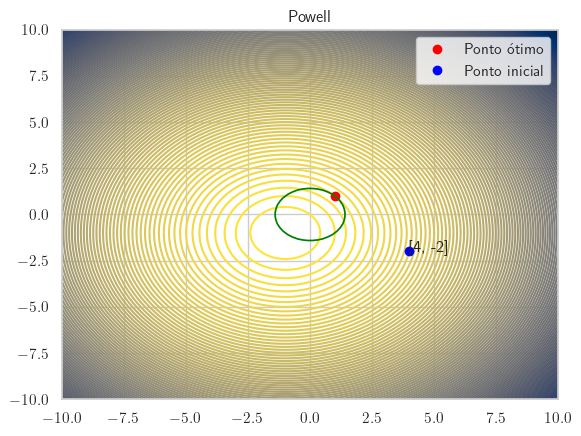


Resultado Final:
Valor ótimo de x: [0.99999644 1.00000356]
Valor ótimo da função objetivo: -8.00000001405299


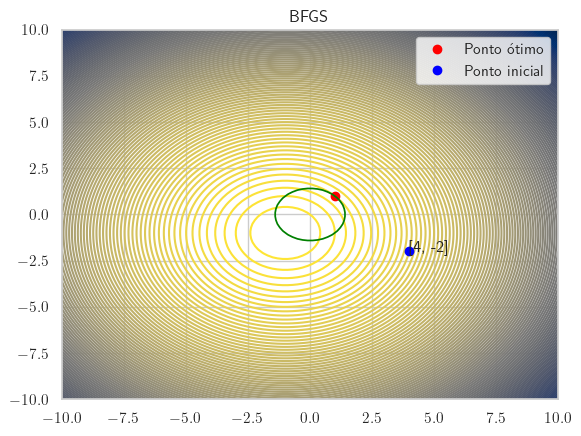

In [98]:
import scipy.optimize as opt
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
f = lambda x: -((x[0]+1)**2+(x[1]+1)**2)
g = lambda x: x[0]**2 + x[1]**2 - 2

def phi(x, ro):
    # Função de penalidade para incorporar restrição
    return f(x) + 0.5*ro*max(0, g(x))**2

def otimizacao_por_penalidade(method_name, x0, ro_inicial, beta, max_iter=10, tol=1e-6):
    x = x0
    ro = ro_inicial

    for i in range(max_iter):
        resultado = minimize(lambda x: phi(x, ro), x, method=method_name)
        x = resultado.x
        ro *= beta  

        if 0.5*ro*max(0, g(x))**2 < tol:
            break

    return x, resultado.fun

# Condições iniciais
x0 = np.array([4, -2])
ro_inicial = 1
beta = 10

resultados = []

for method_name in ['Powell', 'BFGS']:
    # Chamando a função de otimização por penalidade em um loop
    resultado_final, valor_final = otimizacao_por_penalidade(method_name, x0, ro_inicial, beta)
    resultados.append([method_name, resultado_final, valor_final])

    print("\nResultado Final:")
    print("Valor ótimo de x:", resultado_final)
    print("Valor ótimo da função objetivo:", valor_final)

    # plot the functions and results
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 150, cmap='cividis')
    plt.plot(resultado_final[0], resultado_final[1], 'ro', label='Ponto ótimo')
    plt.plot(x0[0], x0[1], 'bo', label = 'Ponto inicial')
    plt.text(x0[0], x0[1], f'[{x0[0]}, {x0[1]}]', fontsize=12)

    # plot constraint g
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    plt.contour(X, Y, Z, 0, colors='green', linewidths=1.25)

    plt.legend()
    plt.title(method_name)
    plt.savefig(f'problema_2_penalidade_{method_name}_{x0}.pdf')
    plt.show()

tab = pd.DataFrame(resultados, columns=['Método', 'x', 'f(x)'])
tab.to_latex('problema_2_penalidade.tex', index=False)



Resultado Final:
Valor ótimo de x: [1.33239072 0.47406219]
Valor ótimo da função objetivo: -1804760610479.0786


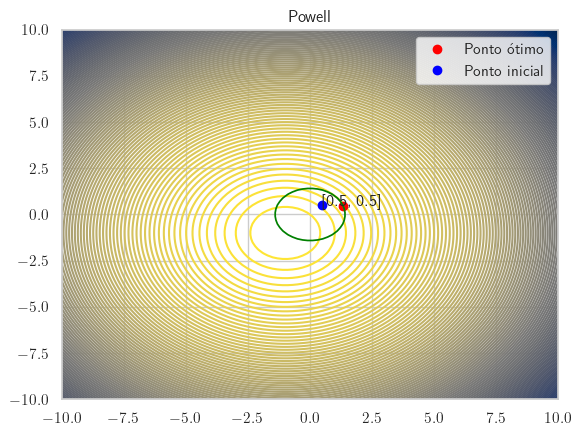


Resultado Final:
Valor ótimo de x: [731.71480095 731.71480095]
Valor ótimo da função objetivo: -1073741.9590537848


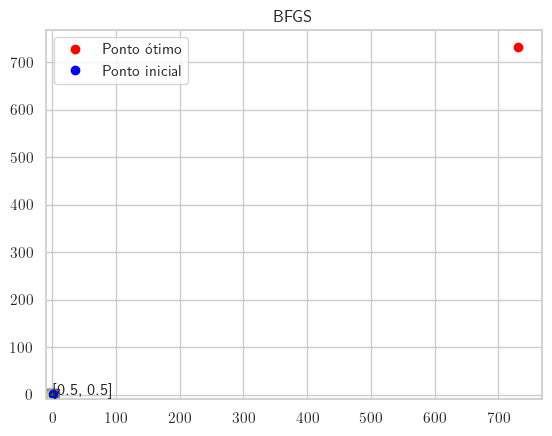

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function to be minimized
f = lambda x: -((x[0]+1)**2+(x[1]+1)**2)
g = lambda x: x[0]**2 + x[1]**2 - 2

def phi(x, ro):
    # Função de barreira para incorporar restrição
    return f(x) + ro * np.sum(1/-g(x))

def otimizacao_por_barreira(method_name, x0, ro_inicial, beta, max_iter=10, tol=1e-6):
    x = x0
    ro = ro_inicial

    for i in range(max_iter):
        resultado = minimize(lambda x: phi(x, ro), x, method=method_name, constraints={'type': 'ineq', 'fun': g})
        x = resultado.x
        ro *= beta

        if ro * np.sum(1/-g(x)) < tol:
            break

    return x, resultado.fun

# Condições iniciais
x0 = np.array([0.5, 0.5])
ro_inicial = 10
beta = 0.1

resultados = []

for method_name in ['Powell', 'BFGS']:
    # Chamando a função de otimização por barreira em um loop
    resultado_final, valor_final = otimizacao_por_barreira(method_name, x0, ro_inicial, beta)
    resultados.append([method_name, resultado_final, valor_final])

    print("\nResultado Final:")
    print("Valor ótimo de x:", resultado_final)
    print("Valor ótimo da função objetivo:", valor_final)

    # Plot the functions and results
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contour(X, Y, Z, 150, cmap='cividis')
    plt.plot(resultado_final[0], resultado_final[1], 'ro', label='Ponto ótimo')
    plt.plot(x0[0], x0[1], 'bo', label='Ponto inicial')
    plt.text(x0[0], x0[1], f'[{x0[0]}, {x0[1]}]', fontsize=12)

    # Plot constraint g
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    plt.contour(X, Y, Z, 0, colors='green', linewidths=1.25)

    plt.legend()
    plt.title(method_name)
    plt.savefig(f'problema_2_barreira_{method_name}_{x0}.pdf')
    plt.show()

tab = pd.DataFrame(resultados, columns=['Método', 'x', 'f(x)'])
tab.to_latex('problema_2_barreira.tex', index=False)